In [99]:
import cv2 # Import relevant libraries 
#import cv 
import numpy as np 
from PIL import ImageFilter 

from PIL import Image
from IPython.display import clear_output

def flou_cercle( path ,alpha=10 ):
    img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    h, w = img.shape

    # Define mask 
    mask = 255*np.ones(img.shape, dtype='uint8') 

    # Draw circle at x = int(w/2), y = int(h/2) of radius 25 and fill this in with 0 
    mask = cv2.circle(mask, ( int(w/2), int(h/2)), 50, color = 0, thickness = -1)  

    # Apply distance transform to mask 
    out = cv2.distanceTransform(mask, cv2.DIST_L2, 3) 

    # Define scale factor 
    scale_factor = alpha

    # Create output image that is the same as the original 
    filtered = img.copy() 

    # Create floating point copy for precision 
    img_float = img.copy().astype('float') 


    # For each pixel in the input... 
    for y in range(h): 
        for x in range(w): 

    # If distance transform is 0, skip 
            if out[y,x] == 0.0:
                continue 

            # Calculate M = d/S 
            mask_val = np.ceil(out[y,x]/scale_factor) 

        # If M is too small, set the mask size to the smallest possible value 
            if mask_val <= 3:
                mask_val = 3 

            # Get beginning and ending x and y coordinates for neighbourhood 
            # and ensure they are within bounds 
            beginx = x-int(mask_val/2) 
            if beginx < 0: 
                beginx = 0 

            beginy = y-int(mask_val/2) 
            if beginy < 0: 
                beginy = 0 

            endx = x+int(mask_val/2) 
            if endx >= w: 
                endx= w-1 

            endy = y+int(mask_val/2) 
            if endy >= h: 
                endy = h-1 

            # Get the coordinates of where we need to grab pixels 
            xvals = np.arange(beginx, endx+1) 
            yvals = np.arange(beginy, endy+1) 
            (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
            col_neigh = col_neigh.astype('int') 
            row_neigh = row_neigh.astype('int') 

        # Get the pixels now 
        # For each channel, do the foveation 
            pix = img_float[row_neigh, col_neigh].ravel() 

     # Calculate the average and set it to be the output 
            filtered[y,x] = int(np.mean(pix)) 
        
        filtered = filtered[:,:] 
    out2=out.astype(int)
    # Show the image 
    display(Image.fromarray( filtered) )
    display(Image.fromarray( mask) )
    #display(Image.fromarray( out2) )


    return(filtered,out2)

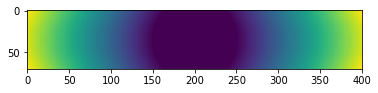

In [91]:
(np.concatenate(b))

plt.imshow(b)

In [78]:
A = np.array((0.4, 1.6, 2.1, -3.7, 2.9))
A.astype(int)

array([ 0,  1,  2, -3,  2])

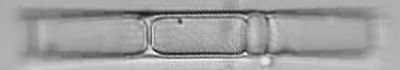

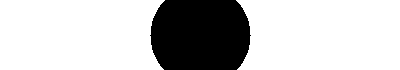

In [103]:
import cv2 # Import relevant libraries 
#import cv 
import matplotlib.pyplot as plt

import numpy as np 
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"
a, b = flou_cercle(path,alpha=10)


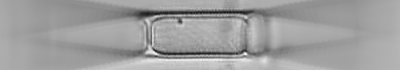

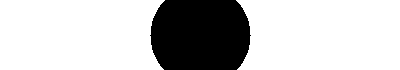

(array([[167, 167, 166, ..., 171, 172, 172],
        [167, 167, 166, ..., 171, 172, 173],
        [167, 167, 166, ..., 172, 173, 173],
        ...,
        [173, 173, 172, ..., 179, 179, 179],
        [173, 173, 172, ..., 179, 179, 179],
        [173, 173, 172, ..., 179, 179, 179]], dtype=uint8),
 array([[153, 152, 151, ..., 150, 151, 152],
        [153, 152, 151, ..., 150, 151, 152],
        [152, 151, 150, ..., 149, 150, 151],
        ...,
        [152, 151, 150, ..., 149, 150, 151],
        [152, 151, 150, ..., 149, 150, 151],
        [153, 152, 151, ..., 150, 151, 152]]))

In [104]:
flou_cercle(path,alpha=3)


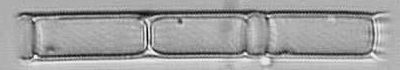

In [34]:
display(Image.fromarray( img) )

10 35 200


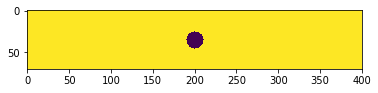

In [26]:
img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
h, w = img.shape
plt.imshow(img) 
mask = 255*np.ones(img.shape, dtype='uint8') 
#plt.imshow(mask) 
mask2 = cv2.circle(mask, (int(h/2), int(w/2)), radius = 10, color = 10,thickness = -1)  
plt.imshow(cv2.circle(mask, (int(w/2),int(h/2)), radius = 10, color = 10,thickness = -1)  ) 

print(np.min(mask2),int(h/2), int(w/2))


In [1]:
img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
h, w = img.shape

# Define mask 
mask = 255*np.ones(img.shape, dtype='uint8') 

# Draw circle at x = 100, y = 70 of radius 25 and fill this in with 0 
cv2.circle(mask, (int(h/2), int(w/2)), 25, 0, -1)  

# Apply distance transform to mask 
out = cv2.distanceTransform(mask, cv2.DIST_L2, 3) 

# Define scale factor 
scale_factor = alpha

# Create output image that is the same as the original 
filtered = img.copy() 

# Create floating point copy for precision 
img_float = img.copy().astype('float') 


# For each pixel in the input... 
for y in range(h): 
for x in range(w): 

# If distance transform is 0, skip 
    if out[y,x] == 0.0:
        continue 

    # Calculate M = d/S 
    mask_val = np.ceil(out[y,x]/scale_factor) 

# If M is too small, set the mask size to the smallest possible value 
    if mask_val <= 3:
        mask_val = 3 

    # Get beginning and ending x and y coordinates for neighbourhood 
    # and ensure they are within bounds 
    beginx = x-int(mask_val/2) 
    if beginx < 0: 
        beginx = 0 

    beginy = y-int(mask_val/2) 
    if beginy < 0: 
        beginy = 0 

    endx = x+int(mask_val/2) 
    if endx >= w: 
        endx= w-1 

    endy = y+int(mask_val/2) 
    if endy >= h: 
        endy = h-1 

    # Get the coordinates of where we need to grab pixels 
    xvals = np.arange(beginx, endx+1) 
    yvals = np.arange(beginy, endy+1) 
    (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
    col_neigh = col_neigh.astype('int') 
    row_neigh = row_neigh.astype('int') 

# Get the pixels now 
# For each channel, do the foveation 

filtered = filtered[:,:] 


IndentationError: expected an indented block (<ipython-input-1-6e644529bc2e>, line 25)

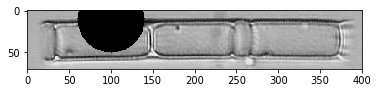

In [7]:
import cv2 # Import relevant libraries 
#import cv 
import matplotlib.pyplot as plt

import numpy as np 
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"
image = cv2.imread(path) 
    
# Window name in which image is displayed 
window_name = 'Image'
   
# Center coordinates 
center_coordinates = (100, 10) 
  
# Radius of circle 
radius = 40
   
# Red color in BGR 
color = 0 
   
# Line thickness of -1 px 
thickness = -1
   
# Using cv2.circle() method 
# Draw a circle of red color of thickness -1 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 
   
# Displaying the image  
plt.imshow( image)  

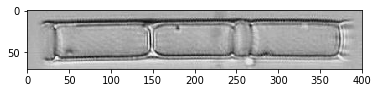

In [2]:
import cv2 # Import relevant libraries 
#import cv 
import matplotlib.pyplot as plt

import numpy as np 
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"
image = cv2.imread(path) 
plt.imshow(image)